In [27]:
import pandas as pd
import numpy as np

In [28]:
disaster=pd.read_csv('/content/disaster_tweets_data.csv')
disaster.head()

,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
disaster.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [30]:
disaster.columns

Index(['tweets', 'target'], dtype='object')

In [31]:
disaster.shape

(7613, 2)

In [32]:
disaster.isnull().sum()

tweets    0
target    0
dtype: int64

In [33]:
disaster.isna().sum()

tweets    0
target    0
dtype: int64

In [34]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
disaster = disaster[['tweets','target']]
ps = PorterStemmer()
remove_punctuation = dict((ord(char), None) for char in string.punctuation)
def get_processed_tokens(text):
    lowers = text.lower()
    no_punctuation = lowers.translate(remove_punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [word for word in tokens if not word in stopwords.words('english')]
    lemmatized_words = [ps.stem(item) for item in filtered ]
    Cleaned_text = ' '.join(lemmatized_words)
    return Cleaned_text
disaster['cleaned_text'] = disaster['tweets'].apply(lambda x: get_processed_tokens(x))

In [36]:
print(disaster['cleaned_text'])

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3       13000 peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    ariaahrari thetawniest control wild fire calif...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Name: cleaned_text, Length: 7613, dtype: object


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 7613)
X = cv.fit_transform(disaster['cleaned_text']).toarray()
y = disaster.iloc[:, 1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (5329, 7613)
X_test shape: (2284, 7613)
y_train shape: (5329,)
y_test shape: (2284,)


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB(alpha=0.2)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [42]:
print('Multinomial NB:')
print()
acc1=accuracy_score(y_test,y_pred1)
print('Accuracy score:',accuracy_score(y_test,y_pred1))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred1))
print()
print('Classification report:\n',classification_report(y_test,y_pred1))

Multinomial NB:

Accuracy score: 0.7937828371278459

Confusion matrix:
 [[1120  198]
 [ 273  693]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [43]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(max_iter=7613)
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)

In [44]:
print('Logistic Reg:')
print()
acc2=accuracy_score(y_test,y2_pred)
print('Accuracy score:',accuracy_score(y_test,y2_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y2_pred))
print()
print('Classification report:\n',classification_report(y_test,y2_pred))

Logistic Reg:

Accuracy score: 0.7968476357267951

Confusion matrix:
 [[1139  179]
 [ 285  681]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.70      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



In [45]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)

In [46]:
print('K Neighbors Classifier:')
print()
acc3=accuracy_score(y_test,y3_pred)
print('Accuracy score:',accuracy_score(y_test,y3_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y3_pred))
print()
print('Classification report:\n',classification_report(y_test,y3_pred))

K Neighbors Classifier:

Accuracy score: 0.6891418563922942

Confusion matrix:
 [[1271   47]
 [ 663  303]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78      1318
           1       0.87      0.31      0.46       966

    accuracy                           0.69      2284
   macro avg       0.76      0.64      0.62      2284
weighted avg       0.75      0.69      0.65      2284



In [47]:
results=pd.DataFrame({
    'Models':['Multinomial NB','LogisticRegression','KNeighbours'],
    'Score': [acc1*100 , acc2*100 ,acc3*100]}).sort_values(by='Score',ascending=False)
results

,Models,Score
1,LogisticRegression,79.684764
0,Multinomial NB,79.378284
2,KNeighbours,68.914186


<Axes: xlabel='Models'>

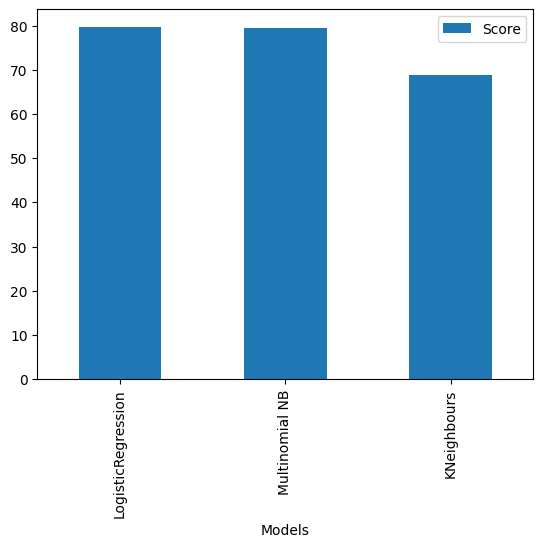

In [48]:
results.plot.bar(x='Models',y='Score')